使用するモジュールのimport

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
# import japanize_matplotlib
import pandas as pd
from pandas import DataFrame

## データの整理

### 量的データの要約

#### 五数要約

- [pythonで四分位点や任意の分位点を計算する3つの方法](https://bunsekikobako.com/how_to_get_quantile_information_with_python/)

In [2]:
x1 = [15, 20, 23, 20, 19, 21, 20, 18, 23, 18, 19, 20, 22]
x2 = [7, 6, 9, 6, 10, 13, 12, 10, 14, 18, 7, 10, 13, 22]

In [3]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
np.percentile(x1, q=[0, 25, 50, 75, 100])

array([15., 19., 20., 21., 23.])

In [4]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
np.percentile(x2, q=[0, 25, 50, 75, 100])

array([ 6. ,  7.5, 10. , 13. , 22. ])

#### 箱ひげ図

- [matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [箱ひげ図を描く【Python】](https://biotech-lab.org/articles/4978)

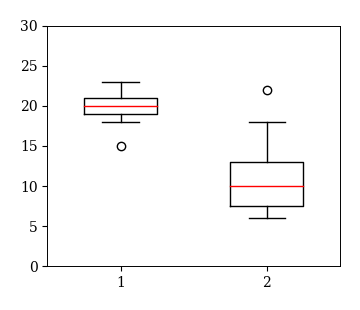

In [5]:
fig, ax = plt.subplots()
ret = ax.boxplot([x1, x2], whis=1.5, widths=0.5, vert=True)

ax.set_ylim(0, 30)  # 縦軸の表示範囲
ax.set_yticks([0, 5, 10, 15, 20, 25, 30])  # 縦軸の表示目盛り
# fig.savefig('figure/box_ex.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

#### ヒストグラム

- [【データサイエンティスト入門編】探索的データ解析（EDA）の基礎操作をPythonを使ってやってみよう](https://www.codexa.net/basic-exploratory-data-analysis-with-python/)

- Iris Dataset
    - Kaggleにて無料会員登録後に下記のURLからダウロード可
    - https://www.kaggle.com/uciml/iris
- アヤメのデータセット
    - Sepal Length – がく片の長さ(cm)
    - Sepal Width – がく片の幅(cm)
    - Petal Length – 花弁の長さ(cm)
    - Petal Width – 花弁の幅(cm)

In [6]:
# CSVファイルをPandasのデータフレーム形式で読み込み
Iris = pd.read_csv('material/sec_2-1/Iris.csv')
Iris = Iris.iloc[:, 1:5]

FileNotFoundError: [Errno 2] No such file or directory: 'material/sec_2-1/Iris.csv'

In [10]:
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [11]:
# ビンの個数（スタージェスの公式）
BN = int(1+np.log2(len(Iris)))

In [12]:
# がく片の長さに対する度数分布表
f, x = np.histogram(Iris['Sepal Length'], bins=BN, density=0)
df = DataFrame(np.c_[x[:-1], x[1:], 0.5*(x[1:]+x[:-1]), f, 100*f/len(Iris), 100*np.cumsum(f/len(Iris))],
          columns=['最小', '最大', '階級値', '度数', '相対度数', '累積相対度数'])
# df.to_csv('material/sec_2-1/fdt.csv', index=False, encoding="shift-jis")
df

,最小,最大,階級値,度数,相対度数,累積相対度数
0,4.30,4.75,4.53,11.0,7.33,7.33
1,4.75,5.20,4.97,30.0,20.00,27.33
2,5.20,5.65,5.43,24.0,16.00,43.33
3,5.65,6.10,5.88,24.0,16.00,59.33
4,6.10,6.55,6.33,31.0,20.67,80.00
5,6.55,7.00,6.78,17.0,11.33,91.33
6,7.00,7.45,7.22,7.0,4.67,96.00
7,7.45,7.90,7.68,6.0,4.00,100.00


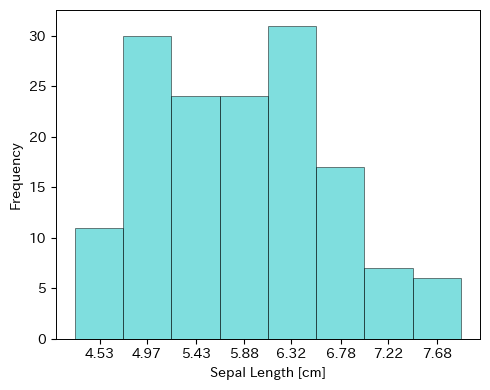

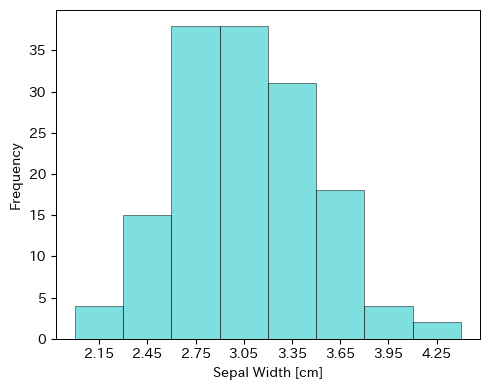

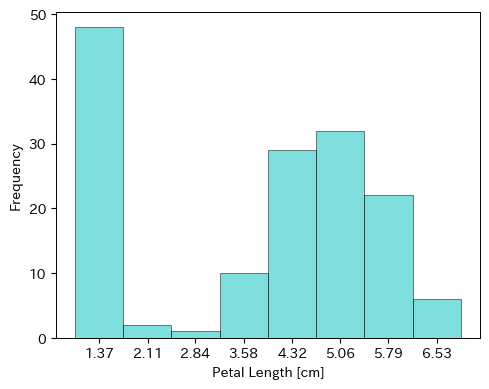

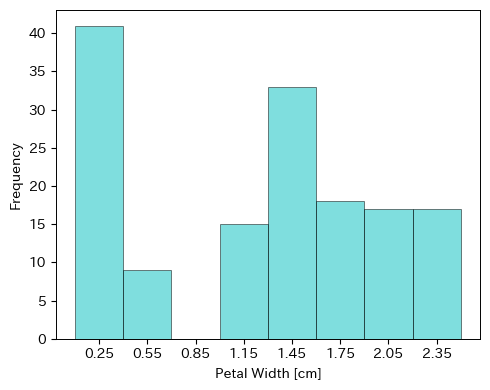

In [13]:
# ヒストグラムの描画と保存
for i in Iris.columns:
    fig, ax = plt.subplots(figsize=(5, 4))
    x = ax.hist(Iris[i], bins=BN, histtype='bar', color='c', ec='k', alpha=0.5)[1]
    x2 = np.round(0.5*(x[1:]+x[:-1]), 2)  # 横軸に表示する階級値を計算（中央値）
    
    ax.set_xticks(x2)  
    ax.set_xlabel(i+' [cm]')
    ax.set_ylabel('Frequency')
    # fig.savefig('figure/histogram_%s.pdf' % i, bbox_・inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

### 実例：夏の避暑地の気候の特徴〜夏の避暑地が快適な理由は？〜

- 日本への外国人旅行者は近年急増しているが，一方で，日本人の国内旅行者の動向を月別に見ると，表のように月ごとに変動している．
- 特に，5月や8月は国内旅行者の数が突出して多くなっているが，これはゴールデンウィークや夏休みを利用して旅行する人が多いからである．

#### 実習
- 表2.2のデータから折れ線グラフを作成せよ

In [14]:
# 2015年の月別国内旅行者数
df = DataFrame({'month': np.arange(12)+1,
                'number': [4315, 3620, 5331, 4456, 6322, 4693, 4458, 7177, 5707, 4647, 4794, 4952]})
df

,month,number
0,1,4315
1,2,3620
2,3,5331
3,4,4456
4,5,6322
5,6,4693
6,7,4458
7,8,7177
8,9,5707
9,10,4647


Text(0, 0.5, 'number')

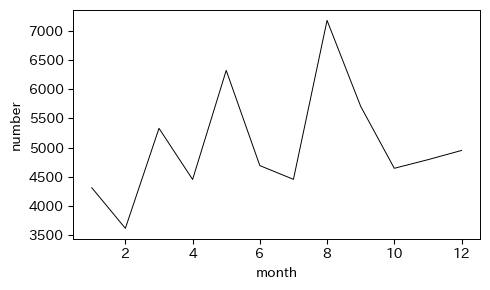

In [15]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df['month'], df['number'])
ax.set_xlabel('month')
ax.set_ylabel('number')

#### STEP2: Plan
- 気象庁のHP (http://www.data.jma.go.jp/gmd/risk/obsdl/index.php) には1日の平均気温，最高気温，最低気温，湿度などのデータが掲載されている．
- ここでは，1日の最高気温，最低気温，湿度のデータを収集する．

- 収集したデータは五数要約や箱ひげ図によって傾向を調べる．
- また，夏の蒸し暑さを定量化した指標である\textbf{不快指数}を計算し，各都市の特徴を調べる．
- 不快指数は気温を$ t $，湿度を$ H $とすると
\begin{align*}
	不快指数=0.81t + 0.01H(0.99t-14.3)+46.3
\end{align*}
によって求められる．
- 一般に，不快指数が75になると人口の約1割が不快を感じ，85になると全員が不快になる（三省堂編集所，大辞林，三省堂(1988)）．

#### STEP3: Data

##### 実習
- 気象庁のHPから2015年8月の各地点の1日の平均気温，最高気温，最低気温，湿度のデータ（csvファイル）をダウンロードせよ．
- ダウンロードしたデータをpythonなどで解析しやすいように加工せよ．

In [16]:
# 加工済みcsvデータ
Tave = pd.read_csv('material/sec_2-1/temp_ave.csv')
Tmax = pd.read_csv('material/sec_2-1/temp_max.csv')
Tmin = pd.read_csv('material/sec_2-1/temp_min.csv')
H = pd.read_csv('material/sec_2-1/humidity.csv')

#### STEP4: Analysis

##### 実習：最高気温
- 各都市の最高気温のデータに対し，五数要約と四分位範囲を求めよ．
- 五数要約の結果から，各都市に対して並行箱ひげ図を作成せよ．

In [17]:
Tmax.describe().loc[['min', '25%','50%', '75%','max']]

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
min,21.00,15.90,20.70,28.70,21.70,26.60
25%,27.65,21.70,27.25,30.90,24.55,31.65
50%,31.90,27.00,33.80,31.50,26.50,33.10
75%,34.35,29.15,35.15,32.75,27.80,36.25
max,37.70,31.10,38.60,33.60,34.50,38.00


Text(0, 0.5, 'Maximum Temperature [$^\\circ$C]')

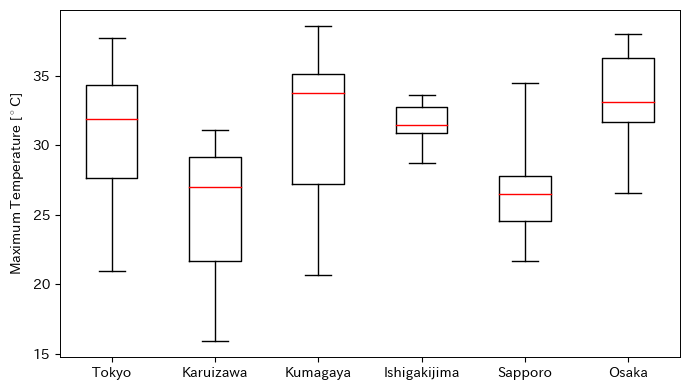

In [18]:
fig, ax = plt.subplots(figsize=(7,4))
ret = ax.boxplot(Tmax.values, labels=Tmax.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Maximum Temperature [$^\circ$C]')
# ax.set_ylim(0, 30)  # 縦軸の表示範囲
# ax.set_yticks([0, 5, 10, 15, 20, 25, 30])  # 縦軸の表示目盛り
# fig.savefig('figure/box_ex.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

##### 実習：最低気温
- 各地点の最低気温のデータについて，並行箱ひげ図を作成せよ
- 各地点について，熱帯夜（最低気温が25℃以上の夜）の日数を求めよ

Text(0, 0.5, 'Minimum Temperature [$^\\circ$C]')

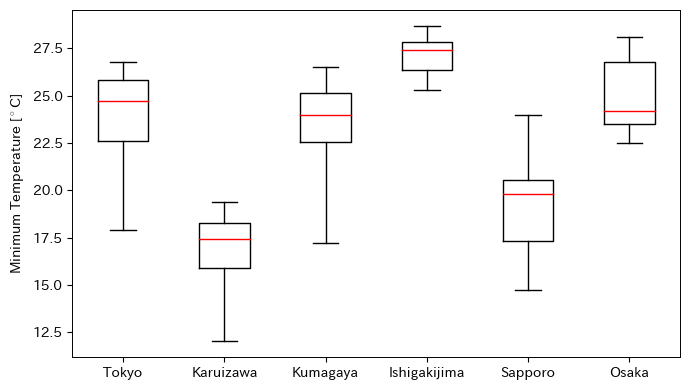

In [19]:
fig, ax = plt.subplots(figsize=(7,4))
ret = ax.boxplot(Tmin.values, labels=Tmax.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Minimum Temperature [$^\circ$C]')

In [20]:
# 熱帯夜の日数
(Tmin >= 25).sum(axis=0)

Tokyo           13
Karuizawa        0
Kumagaya         9
Ishigakijima    31
Sapporo          0
Osaka           13
dtype: int64

##### 実習：不快指数

- 6地点の2015年8月1日から31日までの不快指数を計算せよ
- 各地点の不快指数のデータについて，並行箱ひげ図を作成せよ

In [21]:
DI = 0.81*Tave + 0.01*H*(0.99*Tave-14.3)+46.3
DI

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
0,83.09,72.96,82.50,81.23,72.01,83.03
1,81.84,69.62,79.73,81.50,71.61,82.81
2,80.93,69.58,79.58,81.03,72.68,82.02
3,81.23,70.29,81.77,80.70,76.39,82.21
4,81.52,70.90,81.43,81.22,77.56,82.60
...,...,...,...,...,...,...
26,72.76,64.61,73.15,80.39,66.31,76.60
27,69.91,62.52,70.75,81.16,65.49,77.04
28,67.89,60.62,68.87,81.21,65.84,77.03
29,69.89,60.80,69.13,81.24,66.10,75.82


Text(0, 0.5, 'Discomfort Index')

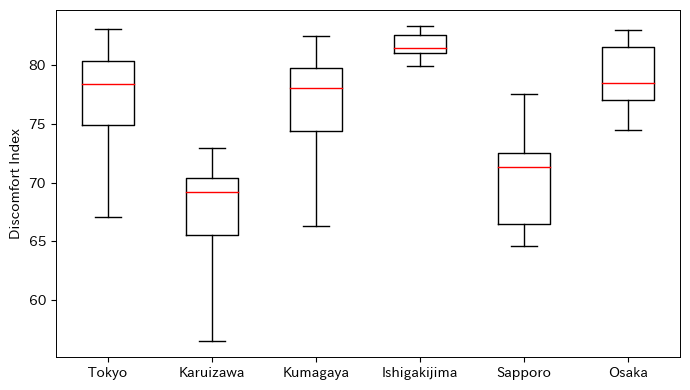

In [22]:
fig, ax = plt.subplots(figsize=(7,4))
ret = ax.boxplot(DI.values, labels=DI.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Discomfort Index')

#### STEP 5: Conclusion

##### 実習
- 最高気温に対する並行箱ひげ図を基に，各地点の特徴について分かったことを次の観点からまとめよ．
    - 東京や大阪のような大都市は避暑地と比べて暑い日が多いか？
	- 避暑地として人気の高い軽井沢は高原にあるが，北海道とどのように違うか？
	- 熊谷や沖縄は暑い地域として有名だが，それぞれで違いはあるか？	 
- 熊谷は最高気温は高いが，最低気温は東京や大阪と比べて低い．なぜこのような違いが出るのか考えよ．
- 不快指数を基に，各都市の特徴をまとめよ
- 軽井沢や札幌は夏の避暑地として人気が高い．その理由をまとめよ．
- その他，分析結果を元に自由に考察せよ．